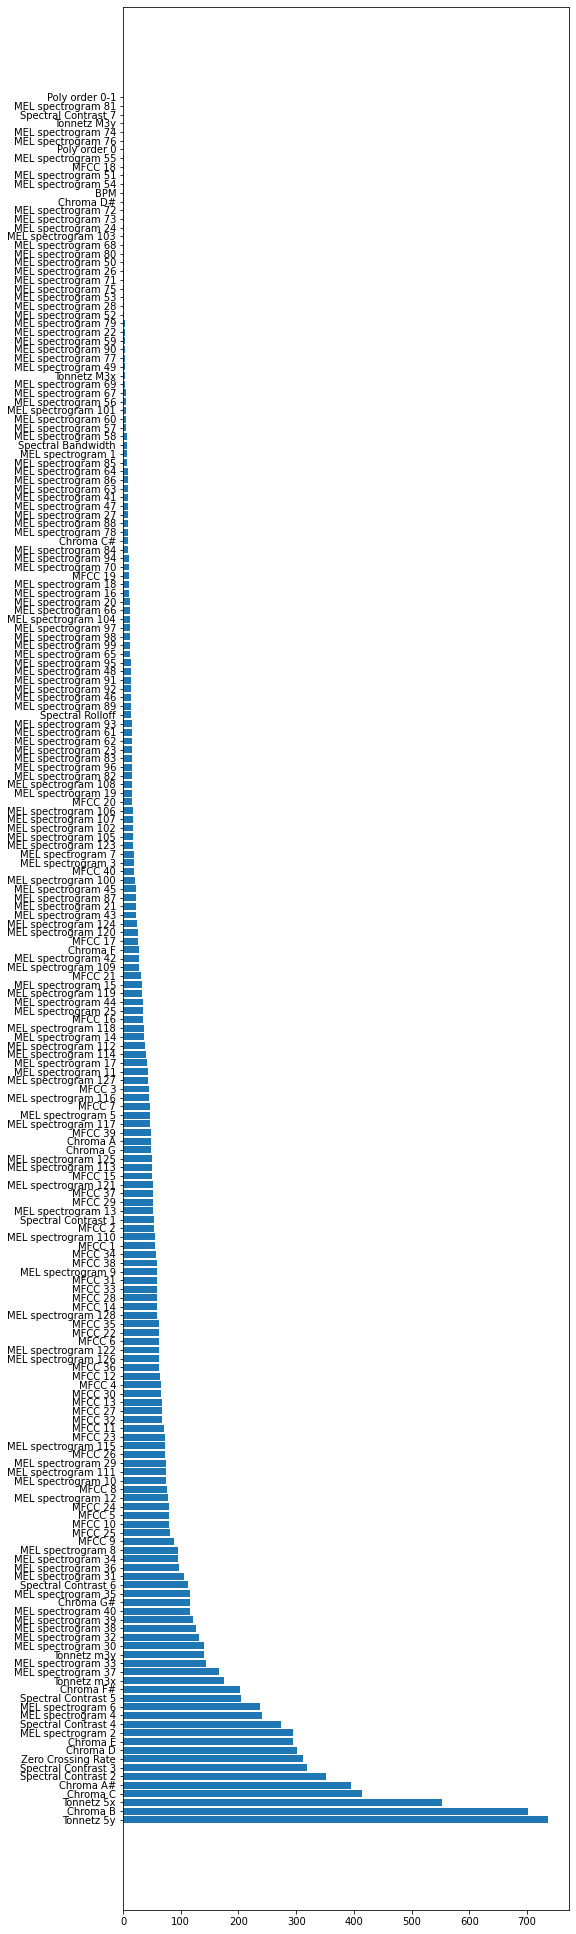

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
from commonFunctions import featureTranslation

 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=5)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


subfolder = 'Dataset/'
featuresdf = pd.read_pickle(subfolder+'pickle/199_exported_features_valence_arousal2021.pkl')

VA = ['valence', 'arousal']
selectVA = VA[1]

X = np.array(featuresdf['features'].tolist()) # input
Y = np.array(featuresdf[selectVA].tolist())
y = Y.T

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

scores = []

for i in range(len(fs.scores_)):
	#print('Feature %s: %f' % (featureTranslation(i), fs.scores_[i]))
	scores.append([featureTranslation(i), fs.scores_[i]])
sortedScores = sorted(scores,key=lambda x: x[1], reverse=True)

# graph
names = [row[0] for row in sortedScores]
height = [row[1] for row in sortedScores]
fig = plt.gcf()
fig.set_size_inches(8, 35)
plt.barh(names, height)
plt.show()

for item in sortedScores:
	#print('%22s: %f' % (item[0], item[1]))
	pass




In [9]:

selectionType = "reliefF"
indexesFeatures = 20 
VA = ['valence', 'arousal']
selectVA = VA[1]
import numpy as np 
import pandas as pd
subfolder = 'Dataset/'
selectedFeatIds = pd.read_pickle(subfolder+'indexes/'+selectionType+'_'+str(indexesFeatures)+'_'+selectVA+'_indexes.pkl')
indexes = np.array(selectedFeatIds['indexes'].tolist()) # read indexes file
print(indexes)

from commonFunctions import featuresTranslation
print(featuresTranslation(indexes))

[195  54  77   0   6  76   1   4   5   8  23  58  25  57  89 198  65  24
  75  90]
['Tonnetz 5y', 'MEL spectrogram 43', 'MEL spectrogram 66', 'Chroma B', 'Chroma F', 'MEL spectrogram 65', 'Chroma A#', 'Chroma G', 'Chroma F#', 'Chroma D#', 'MEL spectrogram 12', 'MEL spectrogram 47', 'MEL spectrogram 14', 'MEL spectrogram 46', 'MEL spectrogram 78', 'BPM', 'MEL spectrogram 54', 'MEL spectrogram 13', 'MEL spectrogram 64', 'MEL spectrogram 79']
